<a href="https://colab.research.google.com/github/jbarker6706/Portfolio7/blob/master/pred_from_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import rospy
from std_msgs.msg import String

import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

cardir = "/home/jbarker6706/Documents/MSDS462/assignment7/test/testcars/"
roaddir = "/home/jbarker6706/Documents/MSDS462/assignment7/test/testemptyroads/"
humandir = "/home/jbarker6706/Documents/MSDS462/assignment7/test/testhumans/"
peopleonroaddir = "/home/jbarker6706/Documents/MSDS462/assignment7/test/testpeopleonroads/"

#rospy.init_node('camera_sim_publisher')

#pub = rospy.Publisher('camera_sim', String, queue_size=10)

#rate = rospy.Rate(2)

# load model
model = load_model('small_last4.h5')
model.summary()

image_class = ["car", "open road", "human", "people on road"]

msg = []

def classify_image(image):
    image_array = img_to_array(image)
    image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
    image_array = preprocess_input(image_array)
    yhat = model.predict(image_array)
    print(yhat)
    return image_class[np.argmax(yhat)]

car_image = load_img(cardir+"5.png", target_size=(224,224))
msg.append(classify_image(car_image))
print(msg[0])

road_image = load_img(roaddir+"4.png", target_size=(224,224))
msg.append(classify_image(road_image))
print(msg[1])

human_image = load_img(humandir+"6.png", target_size=(224,224))
msg.append(classify_image(human_image))
print(msg[2])

peopleonroad_image = load_img(peopleonroaddir+"2.png", target_size=(224,224))
msg.append(classify_image(peopleonroad_image))
print(msg[3])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 32,774,660
Non-trainable params: 7,635,264
_________________________________________________________________
[[1. 0. 0. 0.]]
car
[[0. 1. 0. 0.]]
open road
[[0. 0. 1. 0.]]
human
[[0. 0. 1. 0.]]
human


In [0]:
human_image = load_img(humandir+"6.png", target_size=(224,224))
arr2 = to_arrayimage(human_image)
yhat = model.predict(arr2)
print(yhat)
msg2 = image_class[np.argmax(yhat)]
print(msg2)

peopleonroad_image = load_img(peopleonroaddir+"2.png", target_size=(224,224))
arr3 = to_arrayimage(peopleonroad_image)
yhat = model.predict(arr3)
print(yhat)
msg3 = image_class[np.argmax(yhat)]
print(msg3)


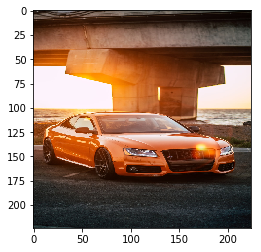

In [0]:
plt.imshow(car_image)


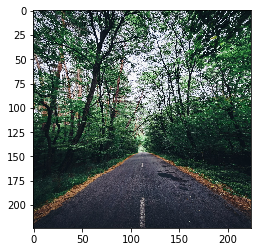

In [0]:
plt.imshow(road_image)


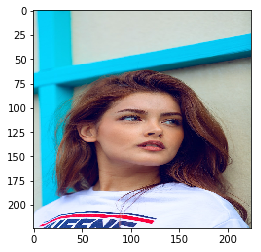

In [0]:
plt.imshow(human_image)


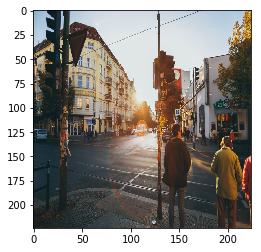

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

#plt.imshow(image.array_to_img(humans[i]))
plt.imshow(peopleonroad_image)

In [0]:
count = 16
print(count%3)

1


In [0]:
car_array = img_to_array(car_image)
road_array = img_to_array(road_image)

car_array = car_array.reshape((1, car_array.shape[0], car_array.shape[1], car_array.shape[2]))
road_array = road_array.reshape((1, road_array.shape[0], road_array.shape[1], road_array.shape[2]))

car_array = preprocess_input(car_array)
road_array = preprocess_input(road_array)

# predict the probability across all output classes
yhat = model.predict(car_array)
# convert the probabilities to class labels
print(yhat)

In [0]:
# predict the probability across all output classes
yhat = model.predict(road_array)
print(yhat)

[[0. 1. 0. 0.]]


In [0]:
print(type(yhat))

<class 'numpy.ndarray'>


In [0]:
import numpy as np

print(np.argmax(yhat))

1


In [0]:
print(yhat)

[[0. 1. 0. 0.]]


In [0]:
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

# predict the probability across all output classes
yhat = model.predict(road_array)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

cmsg = ""
count = 0

